# **Анализ продаж копмпьютерных игр**

*Нам даны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Целью проекта выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Обработаем данные и проведем анализ полученных данных. Опредлим самые популярные платформы, жанры, узнаем ,влияют ли рейтингги игроков и критиков на продажи игр.
В ходе исследования мы узнаем ,какие платформы сейчас популярны, игры каких жанров чаще всего приобретаются, какой возрастной рейтинг самый популярный, а так же составим портреты пользователей из Северной Америке, Европы и Японии*

План проекта: 
 1. Предобработка полученных данных
 2. Исследовательский анализ данных
 3. Составление портрета пользователей из Северной Америки, Европы и Японии
 4. Общий вывод 

## Предобработка полученных данных ##

Импортируем все необходимые нам библиотеки

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy import stats as st
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('/datasets/games.csv') # сохраняем наш датасет в переменную data

In [3]:
data.head(10) #выводим первые 5 строк 

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Подсчитаем количество дубликатов

In [6]:
data.duplicated().sum()

0

Явных дубликатов нет

Изучим данные мы видим, что нам необходимо внести слдедующие корррективы в датасет:
- Привести названия столбцов к нижнему регистру;
- преобразовать типы данных в столбцах Year_of_Release, Critic_Score, User_Score
- Изучить пропуски в столбцах Name, Year_of_Release, Genre, Critic_Score, Critic_Score, User_Score
- разобраться со столбцом User_Score, так как по нему мы не получили данные по среднему значению, медиане и т.д. Верроятно с данными что-то не то

In [7]:
data_column = [] #создадим пустой список, в который запишем названия столбцов в нижнем регистре
for column in data:
    data_column.append (column.lower())
data.columns = data_column #передадим этот список нашему датасету
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Подсчитаем количество пропущенных значеницй в столбце `year_of_release`

In [8]:
data['year_of_release'].isna().sum()

269

269 строк - это примерно 1,6% от общего числа, удалим эти строки

In [9]:
data = data.dropna(subset = ['year_of_release'])
data['year_of_release'].isna().sum()
data['year_of_release']

0        2006.0
1        1985.0
2        2008.0
3        2009.0
4        1996.0
          ...  
16710    2016.0
16711    2006.0
16712    2016.0
16713    2003.0
16714    2016.0
Name: year_of_release, Length: 16446, dtype: float64

Переведем столбец `year_of_release` в формат `integer`

In [10]:

data['year_of_release'] = data['year_of_release'].astype('int')
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


В столбце `critic_score` пропущено больше половины значений. Заменить их просто медианой или средним будет некорректно, так как количество пропущенных значений очень велико. Заменить на 0 тоже будет неправильным, так как при подсчете средних и медианных показателей, эти 0 будут играть большую роль. Поэтому мы оставим этот столбец в формате `float` без изменений. Вероятно к пропускам привели несколько факторов: игра выходила до того, как стали выставляться рейтинговый оценки критиками, игра выходит на непоппулярной платформе, игра продается в малых количествах.

Рассмотрим столбец user_score, выведем список уникальных значений

In [11]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Мы видим ,что есть значения 'tbd', из-за которых столбец имеет формат `object`. Поменяем формат на `float`, заменив значения tbd на пустое значение. Здесь, как и в случае с колонкой `critic_score` пропущено почти половина значений, поэтому замена может исказить данные. 

In [12]:
data['user_score'] = pd.to_numeric(data['user_score'], errors = 'coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Выведем список уникальных значений столбца `rating`

In [13]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Пропуски в этосм столбце так же не трогаем

Выведем на экран строки в которых пропущены значения в колонках `name` и `genre`

In [14]:
data.loc[data['name'].isna() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [15]:
data.loc[data['genre'].isna() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Мы видим ,что это одни и теже строки. Эти 2 строки мы удалим, так как в них не содержится достаточной для анализа информации

In [16]:
data = data.dropna(subset = ['name']).reset_index(drop=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [17]:
data['sum_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Мы молодцы, не забыли создать колонку с общими продажами. 👍 <br> А можно использовать вот такой код:</font><br>
` = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)`

In [18]:
# Комментарий ревьюера
# Посмотрим, что у нас осталось
temp = data.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
 11  sum_sales        16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en colores!']
n

*Мы обработали данные ,привели названия столбцов к "правильному формату", привели все столбцы к правильному формату, удалили строки, информация в которых не была бы полезной для аналиа. Теперь мы можем приступить к анализу данных*

## Исследовательский анализ данных ##

Изучим, сколько игр выпускалось в разные годы, сгруппируем игры по годам и построим гистограмму

In [19]:
data.groupby('year_of_release')['name'].count()

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

<AxesSubplot:title={'center':'Количество игр, выпускаемых в разные годы'}, xlabel='год', ylabel='игры'>

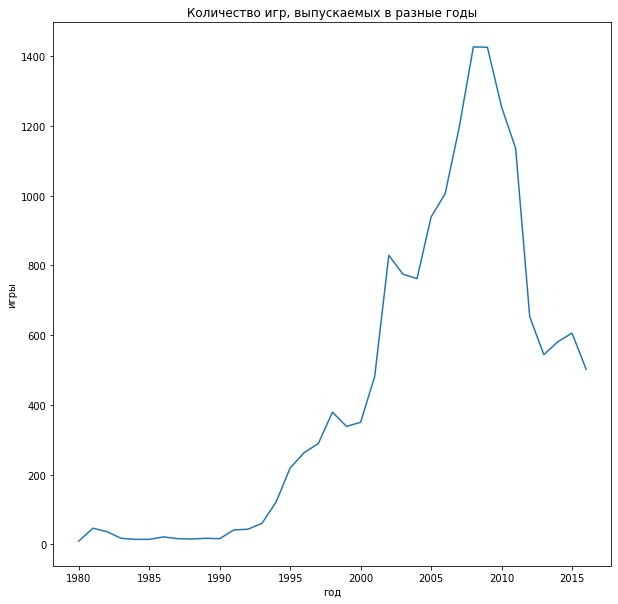

In [20]:
data.groupby('year_of_release')['name'].count().plot(xlabel = 'год', ylabel = 'игры',  
                                                     title='Количество игр, выпускаемых в разные годы', figsize=(10, 10))

Мы видим, что начиная с 1994 года количество игр резко увеличилось, а начиная с 2010 оно начало сокращатся

Выделем платформы с наибольшими продажами и постороим распределение по годам

In [21]:
data.groupby('platform')['name'].count().sort_values(ascending = False)

platform
PS2     2127
DS      2121
PS3     1306
Wii     1286
X360    1232
PSP     1193
PS      1190
PC       957
GBA      811
XB       803
GC       542
3DS      512
PSV      429
PS4      392
N64      316
XOne     247
SNES     239
SAT      173
WiiU     147
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
PCFX       1
GG         1
Name: name, dtype: int64

<AxesSubplot:xlabel='year_of_release'>

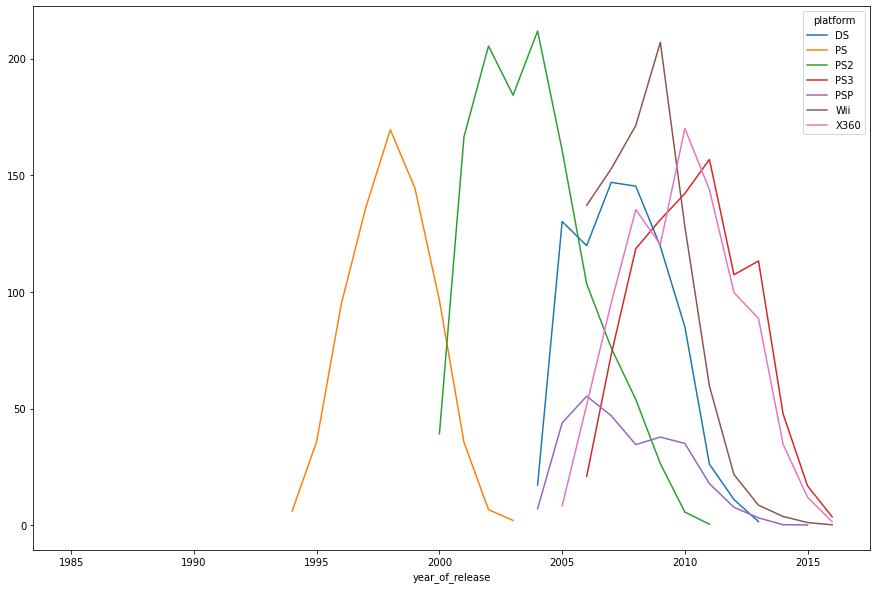

In [22]:
(
    data.
    query('(platform == "PS2") or (platform == "DS") or (platform == "PS3") or (platform == "Wii") or (platform == "X360")\
    or (platform == "PSP") or (platform == "PS")')
    .pivot_table(index = 'year_of_release', columns = 'platform', values = 'sum_sales', aggfunc = 'sum')
    .plot(figsize= (15,10))
)

Мы видим, что все платформы появлялись, достигали своего пика и исчезали примерно за 10 лет

*Для дальнейшего исслежования возьмем период с 2012 года, так как с этого времени количество продаваемых игр перестало падать большими темпами и более менее стабилизировалось*

In [23]:
data_new = data.query('year_of_release > 2011').reset_index(drop = True)
data_new.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
4,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79


Построим график, который позволит сравнить продажи игра на различных платформах

<AxesSubplot:xlabel='year_of_release', ylabel='sum_sales'>

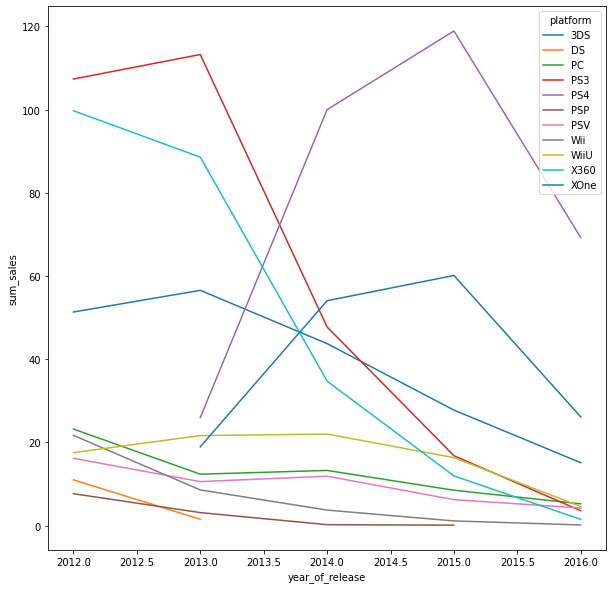

In [24]:
(
    data_new
    .pivot_table(index = 'year_of_release', columns = 'platform', values = 'sum_sales', aggfunc = 'sum')
    .plot(ylabel = 'sum_sales', figsize= (10,10))
)

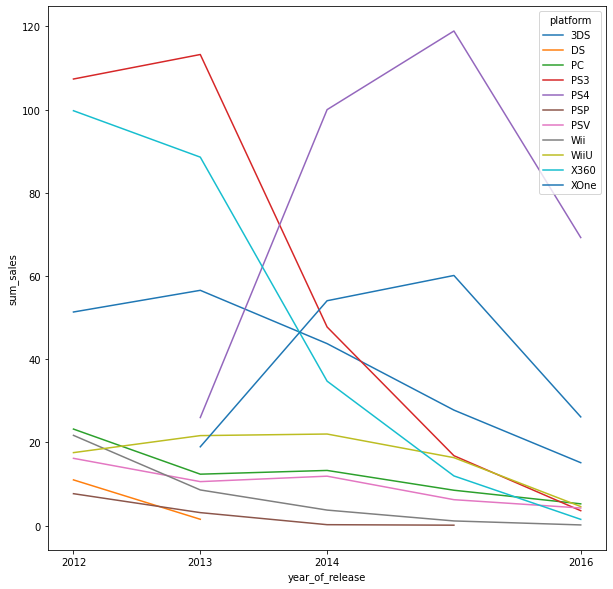

In [25]:
# Комментарий ревьюера 2
(
    data_new
    .pivot_table(index = 'year_of_release', columns = 'platform', values = 'sum_sales', aggfunc = 'sum')
    .plot(ylabel = 'sum_sales', figsize= (10,10))
)
plt.xticks([2012,2013,2014,2016])
plt.show()

Чтобы было нагляднее построим тепловую карту продаж, 

<AxesSubplot:xlabel='year_of_release', ylabel='platform'>

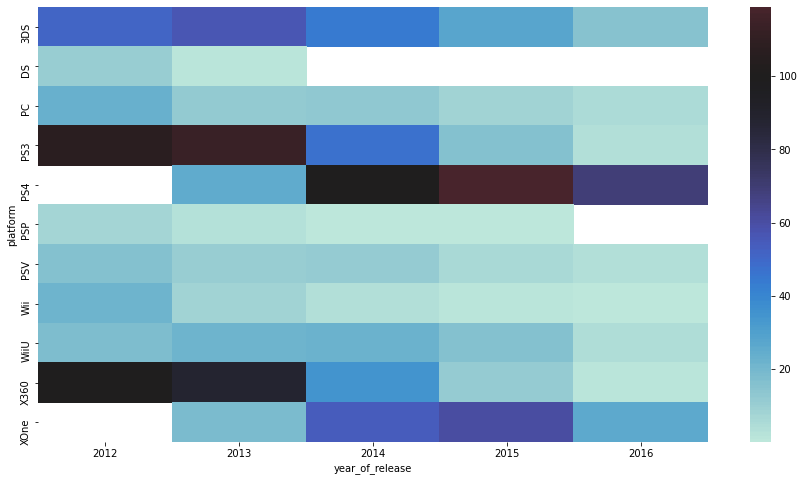

In [26]:
data_pivot = (
    data_new
    .pivot_table(index = 'platform', columns = 'year_of_release', values = 'sum_sales', aggfunc = 'sum')   
)
plt.figure(figsize = (15,8))
sb.heatmap(data_pivot, center= 100)

Мы видим, что в целом динамика по продажам в последжнее время низходящая, больше всех продают игры на платформу PS4, продажи игры на PCV хоть и находятся на невысоком уровне, но продаются стабильно

Посторим диаграмму размаха по глобальным продажам игр в разбивке по платформам

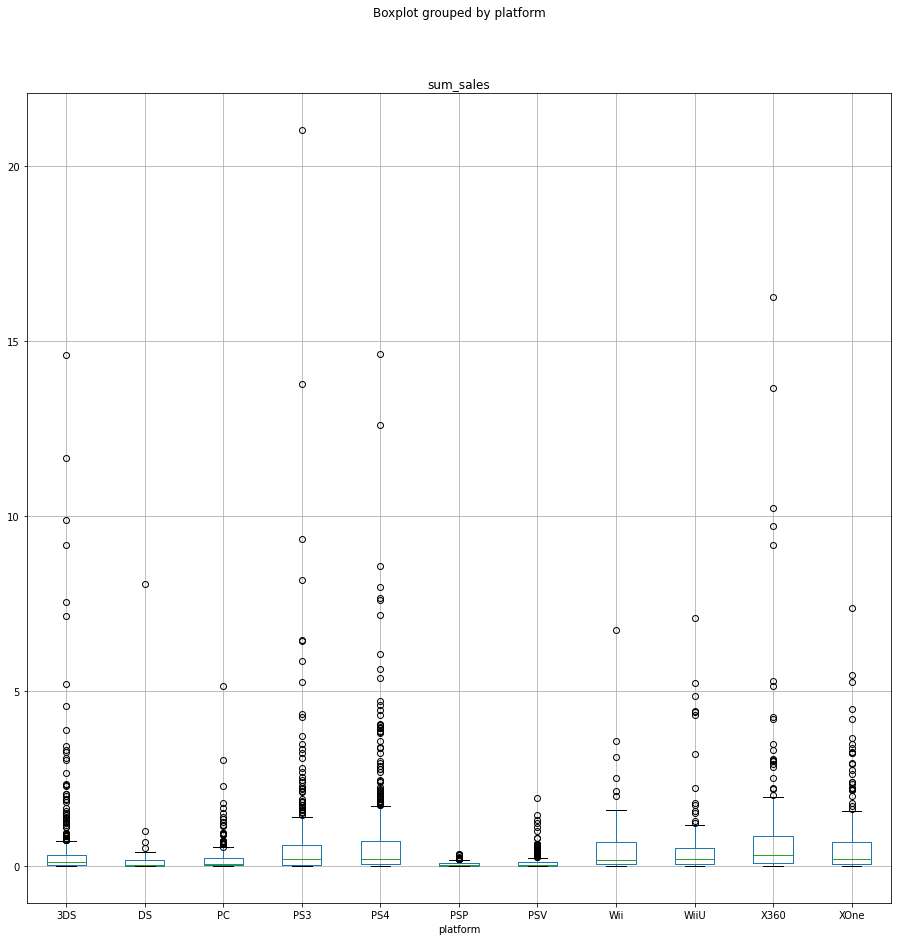

In [27]:

data_new.boxplot(column='sum_sales', by='platform', figsize=(15, 15))
plt.show()

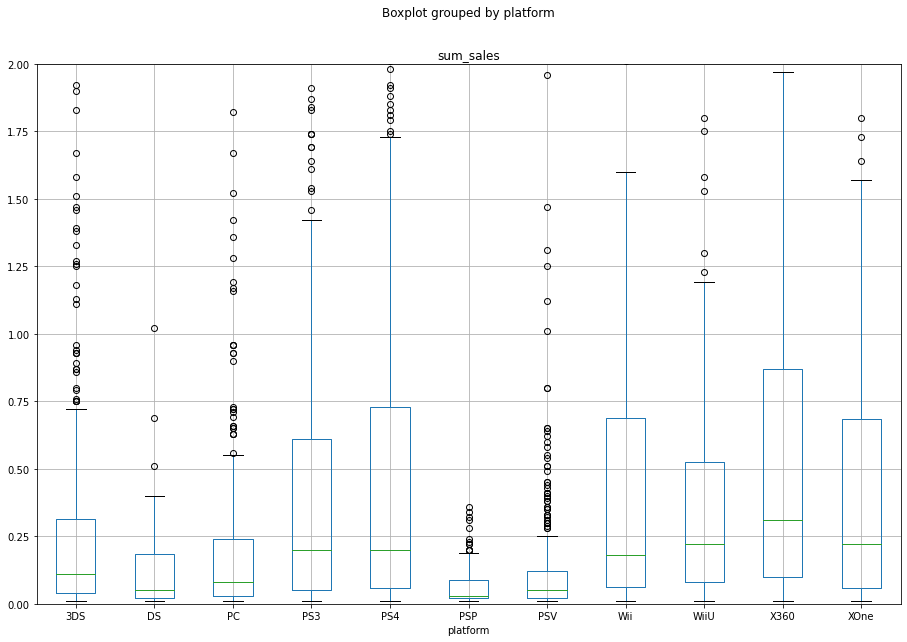

In [61]:
# Комментарий ревьюера 3
data_new.boxplot(column='sum_sales', by='platform', figsize=(15, 10))
plt.ylim(0,2)
plt.show()

Мы видим по каждой платформе большое количсество выбросов. Это может бьть связано с тем, что некоторое игры умели большой успех и сильно выделялись продажами на фоне остальных

Возьмем платформу PS4 и посчитаем зависимость продаж от рейтингов для этой платформы

<AxesSubplot:title={'center':'PS4'}, xlabel='sum_sales', ylabel='critic_score'>

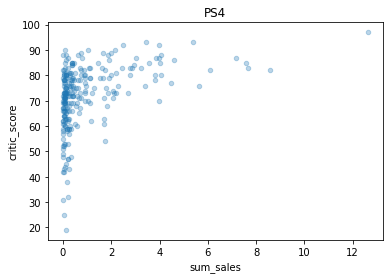

In [29]:
data_new.query('platform == "PS4"').plot(x = 'sum_sales', y = 'critic_score', kind='scatter', title = 'PS4', alpha=0.3)

In [30]:
data_new.query('platform == "PS4"')['sum_sales'].corr(data_new.query('platform == "PS4"')['critic_score'])

0.406567902061781

<AxesSubplot:xlabel='sum_sales', ylabel='user_score'>

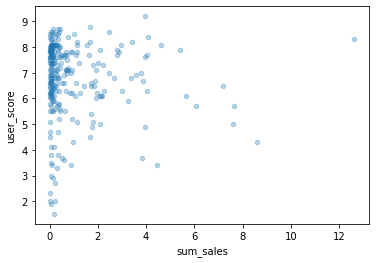

In [31]:
data_new.query('platform == "PS4"').plot(x = 'sum_sales', y = 'user_score', kind='scatter', alpha=0.3)

In [32]:
data_new.query('platform == "PS4"')['sum_sales'].corr(data_new.query('platform == "PS4"')['user_score'])

-0.031957110204556376

Мы видим слабую зависимость продажи игр для PS4 от рейтинга критиков, зависимости от рейтинга игроков нет

Построим диаграммы рассевания и рассчитаем коэффициент корреляции для остальных платформ

Коэффициент корреляции для от оценок специалистов для платформы PS3 : 0.3314972592629587
Коэффициент корреляции для от оценок игроков для платформы PS3 : -0.005143522887113828
--------------------


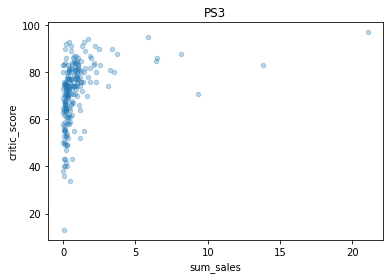

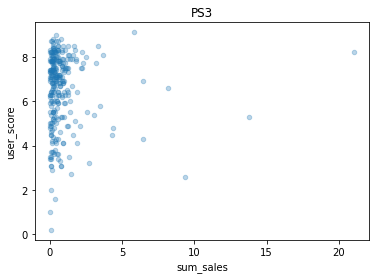

Коэффициент корреляции для от оценок специалистов для платформы X360 : 0.36057348885073365
Коэффициент корреляции для от оценок игроков для платформы X360 : 0.0061639786462133256
--------------------


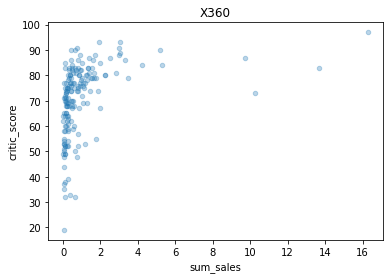

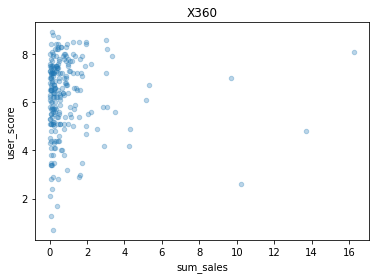

Коэффициент корреляции для от оценок специалистов для платформы 3DS : 0.32080286953607845
Коэффициент корреляции для от оценок игроков для платформы 3DS : 0.19758263411038596
--------------------


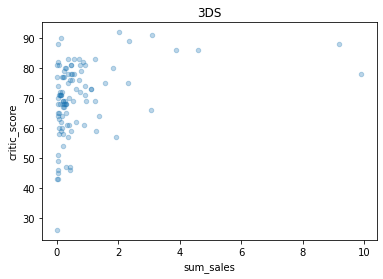

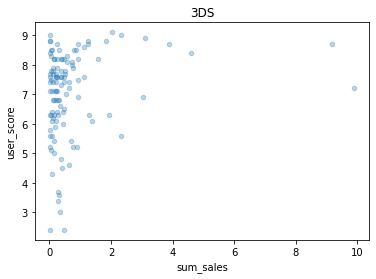

Коэффициент корреляции для от оценок специалистов для платформы DS : nan
Коэффициент корреляции для от оценок игроков для платформы DS : 0.88270872757644
--------------------


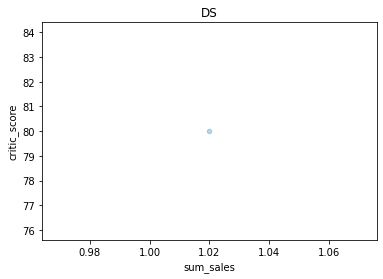

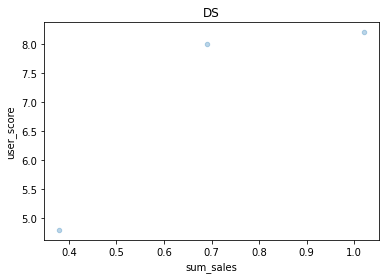

Коэффициент корреляции для от оценок специалистов для платформы XOne : 0.41699832800840175
Коэффициент корреляции для от оценок игроков для платформы XOne : -0.06892505328279412
--------------------


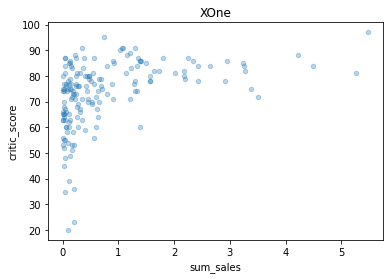

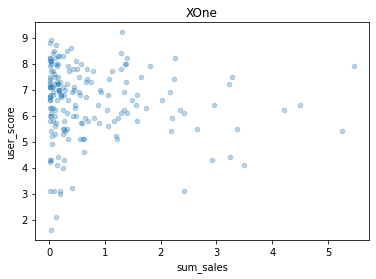

Коэффициент корреляции для от оценок специалистов для платформы WiiU : 0.3483797601201749
Коэффициент корреляции для от оценок игроков для платформы WiiU : 0.4002190202148617
--------------------


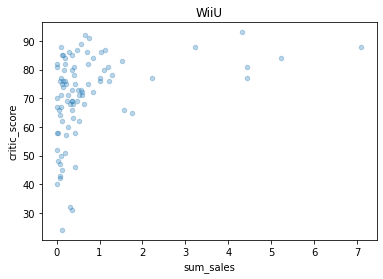

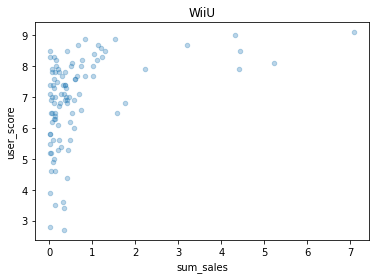

Коэффициент корреляции для от оценок специалистов для платформы Wii : -0.4243413011077495
Коэффициент корреляции для от оценок игроков для платформы Wii : 0.2961968000747953
--------------------


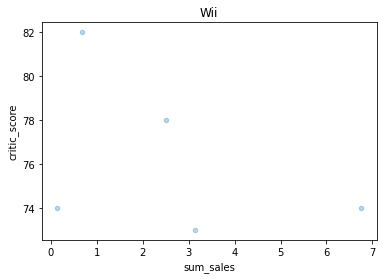

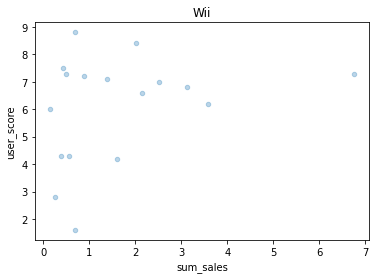

Коэффициент корреляции для от оценок специалистов для платформы PC : 0.23724324311567918
Коэффициент корреляции для от оценок игроков для платформы PC : -0.12186747630735577
--------------------


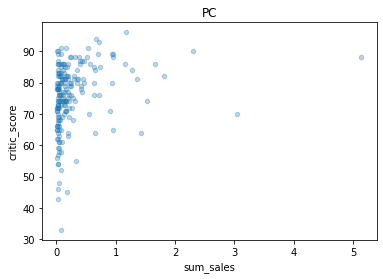

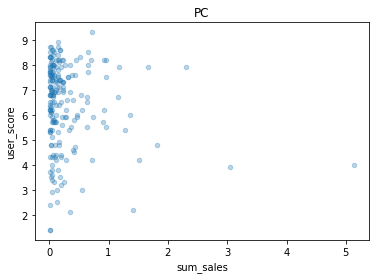

Коэффициент корреляции для от оценок специалистов для платформы PSV : 0.09448789929316172
Коэффициент корреляции для от оценок игроков для платформы PSV : -0.004339437514314869
--------------------


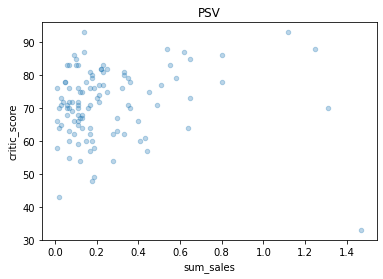

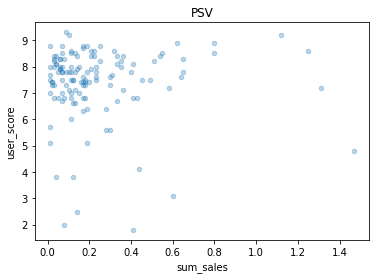

Коэффициент корреляции для от оценок специалистов для платформы PSP : nan
Коэффициент корреляции для от оценок игроков для платформы PSP : -0.802302061939321
--------------------


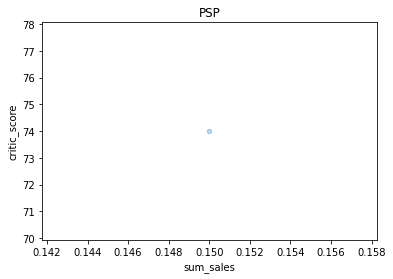

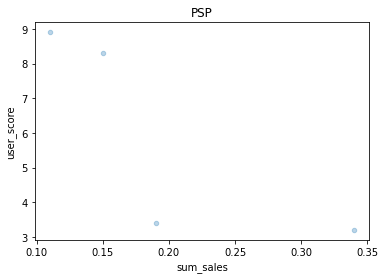

In [33]:
data_platform = data_new['platform'].unique()
for i in data_platform:
    if i != 'PS4':
        (
            data_new.loc[data_new['platform'] == i]
            .plot(x = 'sum_sales', y = 'critic_score', kind='scatter', title = i, alpha=0.3)
        )
        (
            data_new.loc[data_new['platform'] == i]
            .plot(x = 'sum_sales', y = 'user_score', kind='scatter', title = i, alpha=0.3)
        )
        print('Коэффициент корреляции для от оценок специалистов для платформы', i, ':',
              data_new.query('platform == @i')['sum_sales'].corr(data_new.query('platform == @i')['critic_score']))
        print('Коэффициент корреляции для от оценок игроков для платформы', i, ':',
              data_new.query('platform == @i')['sum_sales'].corr(data_new.query('platform == @i')['user_score']))
        print('-'*20)
        plt.show()
                

Мы видим схожие результаты: слабую зависимость от рейтинга критиков и практическое отсутствие зависимости от рейтингов игроков. Высокий коэффициент корреляции между рейтингом игроков и продажами для платформы DS не дает нам никакой информации, потому, что на диаграмме рассеввания видно, что было поставлено всего 3 оценки, а это крайне мало, чтобь делать какие-то выводы

Посмотрим на распределение игр по жанрам

In [34]:
data_new.groupby('genre')['sum_sales'].sum().sort_values(ascending = False)

genre
Action          441.12
Shooter         304.73
Role-Playing    192.80
Sports          181.07
Misc             85.04
Platform         61.00
Racing           53.50
Fighting         44.49
Simulation       35.12
Adventure        29.43
Strategy         13.34
Puzzle            4.89
Name: sum_sales, dtype: float64

Мы видим, что чаще всего с большим отрывом продают игры в жанре Action, а реже всего игры в жанрах Puzzle и Strategy. Сравним медианные продажи, чтобы видеть ,какие жанры стабильнее всего продаются, независимо от платформ

In [35]:
data_new.groupby('genre')['sum_sales'].median().sort_values(ascending = False)

genre
Shooter         0.440
Sports          0.240
Platform        0.210
Role-Playing    0.140
Racing          0.140
Fighting        0.130
Action          0.120
Misc            0.120
Simulation      0.120
Strategy        0.080
Puzzle          0.045
Adventure       0.030
Name: sum_sales, dtype: float64

Мы видим другую картину, медиана жанре `Shooter` больше остальных, значит игры этого жанра стабильно покупают. А жанр `Action` только на 7 месте. Вероятно, игры этого жанра хорошо только на какой-то определенной платформе, или была игра, которая дала очень большие продажи

Построим диаграмму размаха продаж игр разных жанров

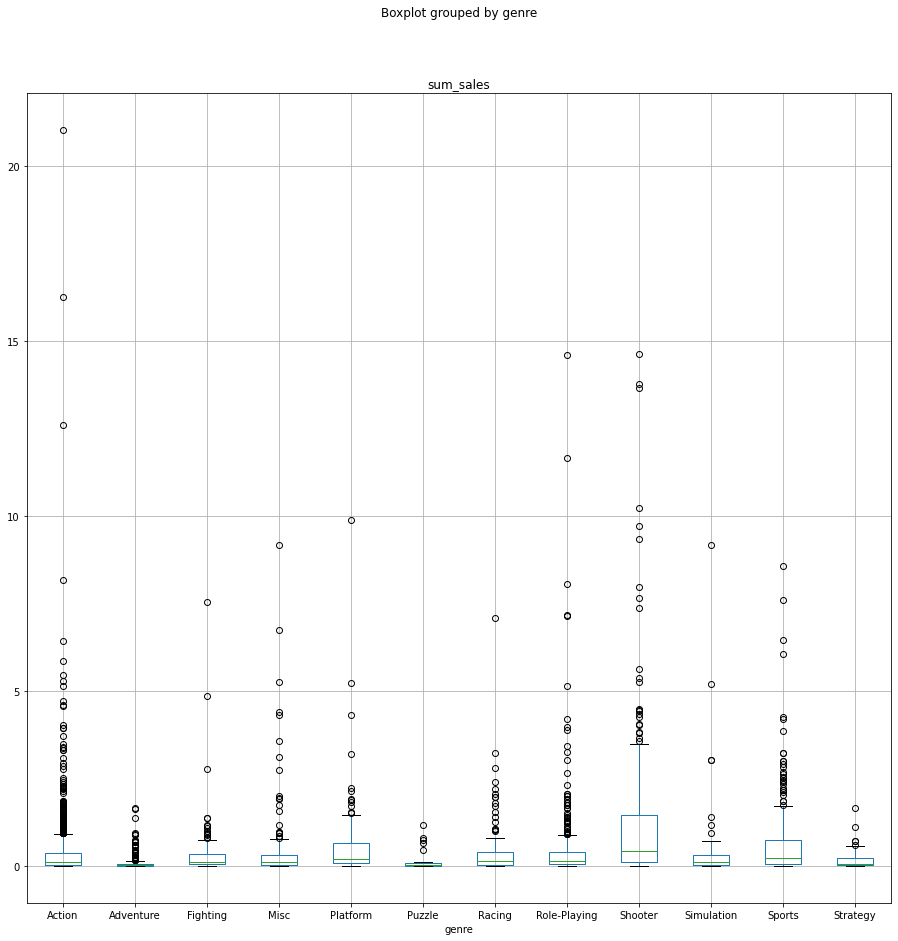

In [36]:


data_new.boxplot(column='sum_sales', by='genre', figsize=(15, 15))
plt.show()

Из диаграммы видно, что игры в жанре Shooter продаются лучше всего. А большое количество продаж игр в жанре Action связвно с несколькими сверуспешными проектами

## Составление портрета пользователей из Северной Америки, Европы и Японии ##

Составим портрет пользователя из Северной Америки

In [37]:
# Выведем на экран топ-5 самых популярных платформ в Северной Америки
(
    data_new
    .groupby('platform')['na_sales'].sum()
    .sort_values(ascending = False)
    .head()
)

platform
X360    140.05
PS4     108.74
PS3     103.38
XOne     93.12
3DS      55.31
Name: na_sales, dtype: float64

Самыми популярными платформами за последние 10 лет остаются Xbox 360, PS3 и Wii. Обяснить это можно тем, что на момент появления эти платформы были прорывом в мировой игровой индустрии и они по сей день пользуются спросом из-за своей недорогой стоимости относительно новых современных платформ

In [38]:
# Выведем на экран топ-5 жанров
(
    data_new
    .groupby('genre')['na_sales'].sum()
    .sort_values(ascending = False)
    .head()
)

genre
Action          177.84
Shooter         144.77
Sports           81.53
Role-Playing     64.00
Misc             38.19
Name: na_sales, dtype: float64

*Топ 5 жанров полностью совпадает с общим топ-5, только с той разницей, что различие между жанрами Action и Shooter не такие большие. Для наглядности объеденим остальные жанры в переменную `other` и построим круговую диаграмму*

Создадим новый дата фрейм `na_genre`, в который запишем жанры и продажи, отсортированные по убыванию, затем создадим переменную `other_na` и запишем в нее сумму всех продаж жанров не из топ-5

In [39]:
na_genre = (
    data_new
    .groupby('genre')['na_sales'].sum() #создаем переменную na_genre
    .sort_values(ascending = False)
    
)
na_genre = na_genre.to_frame().reset_index() # делаем из списка датафрейм
other_na = na_genre.loc[5:, 'na_sales'].sum()
na_genre = na_genre.drop(na_genre[5:].index) # удаляем элементы не из топ-5 жанров



In [40]:

other = {'genre': 'other', 'na_sales': other_na}
na_genre = na_genre.append(other, ignore_index=True) # добавляем строку other в датафрейм

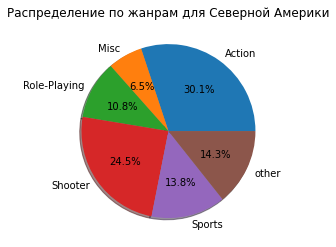

In [41]:
(
    na_genre.groupby('genre')['na_sales'].sum()
    .plot(ylabel = '', kind = 'pie', autopct='%1.1f%%', shadow=True, title = 'Распределение по жанрам для Северной Америки')
)    # строим стобчатую диаграмму
plt.show() 


Посчитаем количество продаж игра каждого рейтинга от организации ESRB 

In [42]:
data_new['rating'] = data_new['rating'].fillna('No ESRB')
(
    data_new
    .groupby('rating')['na_sales'].sum()
    .sort_values(ascending = False)
)

rating
M          231.57
E          114.37
No ESRB    103.31
E10+        75.70
T           66.02
Name: na_sales, dtype: float64

Мы видим ,что чаще всего продают игры с рейтингом Е (для всех возрастов) и игры с рейтингом М (для детей от 17 и старше)

*Составим портрет пользователя из Европы*

In [43]:
# Выведем на экран топ-5 самых популярных платформ в Европе
(
    data_new
    .groupby('platform')['eu_sales'].sum()
    .sort_values(ascending = False)
    .head()
)

platform
PS4     141.09
PS3     106.86
X360     74.52
XOne     51.59
3DS      42.64
Name: eu_sales, dtype: float64

Самыми популярными платформами за последние 10 лет остаются Xbox 360, PS3 и Wii. Однако продажи игр на PS3 самые большие, а объем продаж в целом в Европе меньше ,чем в Северной Америке

In [44]:
# Выведем на экран топ-5 жанров
(
    data_new
    .groupby('genre')['eu_sales'].sum()
    .sort_values(ascending = False)
    .head()
)

genre
Action          159.34
Shooter         113.47
Sports           69.09
Role-Playing     48.53
Racing           27.29
Name: eu_sales, dtype: float64

Топ 5 жанров почти полностью совпадает с общим топ-5, только с той разницей, что на 5 месте жанр Racing, европейцы любят погоняться.

Для наглядности построим круговую диаграмму

In [45]:
eu_genre = (
    data_new
    .groupby('genre')['eu_sales'].sum() #создаем переменную na_genre
    .sort_values(ascending = False)
    
)
eu_genre = eu_genre.to_frame().reset_index() # делаем из списка датафрейм
other_eu = eu_genre.loc[5:, 'eu_sales'].sum()
eu_genre = eu_genre.drop(eu_genre[5:].index) # удаляем элементы не из топ-5 жанров


In [46]:
other = {'genre': 'other', 'eu_sales': other_eu}
eu_genre = eu_genre.append(other, ignore_index=True)
eu_genre # добавляем строку other в датафрейм

,genre,eu_sales
0,Action,159.34
1,Shooter,113.47
2,Sports,69.09
3,Role-Playing,48.53
4,Racing,27.29
5,other,89.10


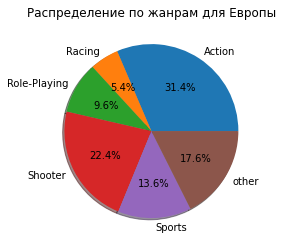

In [47]:
(
    eu_genre.groupby('genre')['eu_sales'].sum()
    .plot(ylabel = '', kind = 'pie', autopct='%1.1f%%', shadow=True, title = 'Распределение по жанрам для Европы')
)    # строим стобчатую диаграмму
plt.show() 

Посчитаем количество продаж игра каждого рейтинга от организации ESRB 

In [48]:
(
    data_new
    .groupby('rating')['eu_sales'].sum()
    .sort_values(ascending = False)
)

rating
M          193.96
E          113.03
No ESRB     91.50
E10+        55.37
T           52.96
Name: eu_sales, dtype: float64

Мы видим ,что чаще всего продают игры с рейтингом Е (для всех возрастов) и игры с рейтингом М (для детей от 17 и старше)

*Составим портрет пользователя из Японии*

In [49]:
# Выведем на экран топ-5 самых популярных платформ в Японии
(
    data_new
    .groupby('platform')['jp_sales'].sum()
    .sort_values(ascending = False)
    .head()
)

platform
3DS     87.79
PS3     35.29
PSV     21.04
PS4     15.96
WiiU    13.01
Name: jp_sales, dtype: float64

Мы видим, что в японии популярны платформы DS и 3DS, возможно это какие-то местные разработки

In [50]:
# Выведем на экран топ-5 жанров
(
    data_new
    .groupby('genre')['jp_sales'].sum()
    .sort_values(ascending = False)
    .head()
)

genre
Role-Playing    65.44
Action          52.80
Misc            12.86
Simulation      10.41
Fighting         9.44
Name: jp_sales, dtype: float64

Мы видим ,что предпочтения Японцев отличаются от остальных, на 1-м месте жанр Role-Playing

Построим круговую диаграмму

In [51]:
jp_genre = (
    data_new
    .groupby('genre')['jp_sales'].sum() #создаем переменную na_genre
    .sort_values(ascending = False)
    
)
jp_genre = jp_genre.to_frame().reset_index() # делаем из списка датафрейм
other_jp = jp_genre.loc[5:, 'jp_sales'].sum()
jp_genre = jp_genre.drop(jp_genre[5:].index) # удаляем элементы не из топ-5 жанров

In [52]:
other = {'genre': 'other', 'jp_sales': other_eu}
jp_genre = jp_genre.append(other, ignore_index=True)
jp_genre # добавляем строку other в датафрейм

,genre,jp_sales
0,Role-Playing,65.44
1,Action,52.80
2,Misc,12.86
3,Simulation,10.41
4,Fighting,9.44
5,other,89.10


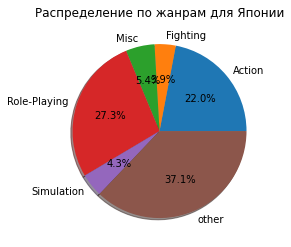

In [53]:
(
    jp_genre.groupby('genre')['jp_sales'].sum()
    .plot(ylabel = '', kind = 'pie', autopct='%1.1f%%', shadow=True, title = 'Распределение по жанрам для Японии')
)    # строим стобчатую диаграмму
plt.show() 

Посчитаем количество продаж игра каждого рейтинга от организации ESRB 

In [54]:
(
    data_new
    .groupby('rating')['jp_sales'].sum()
    .sort_values(ascending = False)
)

rating
No ESRB    108.84
E           28.33
T           26.02
M           21.20
E10+         8.19
Name: jp_sales, dtype: float64

</font><font color='Blue'><b>спасибо 👌 в яндексе таких кодов нет)</b></font><br>

<font color='DarkBlue'><b>Комментарий ревьюера 3</b></font><br>
<font color='DarkGreen'>👌 Есть в Яндекс.Практикуме. 😉</font>

In [55]:
# Комментарий ревьюера
temp = data_new.copy()
print(temp.rating.isna().sum(), temp.rating.isna().sum()/len(temp))
temp.rating.value_counts()

0 0.0


No ESRB    1275
M           498
T           412
E           395
E10+        306
Name: rating, dtype: int64

Мы видим ,что чаще всего продают игры с рейтингом Е (для всех возрастов) и игры с рейтингом М (для детей от 17 и старше)

## Сформулируем и проверим гипотезы ##

Сформулируем нулевую гипотезу: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые; тогда альтернативная гопитеза будет звучать так:Средние пользовательские рейтинги платформ Xbox One и PC различны;
Критический уровень статистической значимости зададим значением 0,05. Из диаграммы рассеивания можно сделать вывод ,что размер и дисперсия выборок может отличаться, поэтому укажем параметр equal_var = False

Выведем на экран среднее значение пользовательских рейтингов по платформам

In [56]:
data_new.groupby('platform')['user_score'].mean()

platform
3DS     7.033333
DS      7.000000
PC      6.428641
PS3     6.532862
PS4     6.748249
PSP     5.950000
PSV     7.410000
Wii     6.082353
WiiU    6.904000
X360    6.220851
XOne    6.521429
Name: user_score, dtype: float64

In [57]:
alpha = 0.05
results = st.ttest_ind(
    data_new.query('(platform == "XOne") & (user_score >0)')['user_score'], 
    data_new.query('(platform == "PC") & (user_score >0)')['user_score'], equal_var = False)
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5489537965134912
Не получилось отвергнуть нулевую гипотезу


При данном значении Критическог оуровня значимости, мы не можем отвергнуть нулевую гипотезу

Сформулируем нулевую гипотезу: Средние пользовательские рейтинги жанров Action и Sports одинаковые; тогда альтернативная гопитеза будет звучать так:Средние пользовательские рейтинги жанров Action и Sports различны; 
Критический уровень статистической значимости зададим значением 0,05. Так как размер выборок отличаются, пример equal_var = False

Выведем на экран среднее значение пользовательских рейтингов по жанрам

In [58]:
data_new.groupby('genre')['user_score'].mean()

genre
Action          6.825048
Adventure       7.466667
Fighting        6.895714
Misc            6.938806
Platform        6.806061
Puzzle          7.633333
Racing          6.151163
Role-Playing    7.258480
Shooter         6.435897
Simulation      6.511905
Sports          5.455897
Strategy        6.420000
Name: user_score, dtype: float64

In [59]:
alpha = 0.05
results = st.ttest_ind(
    data_new.query('(genre == "Action") & (user_score >0)')['user_score'], 
    data_new.query('(genre == "Sports") & (user_score >0)')['user_score'], equal_var = False)
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.24307776572644e-20
Отвергаем нулевую гипотезу


отвергаем нулевую гипотезу

Нулевые гипотезы мы формулировали изходя из того, что нам нужно было проверить. Альтернвтивные гипотезы - это утверждение, которое принимается верным, если отвергается нулеваяя гипотезы, в данном случае мы формулировали альтернативные нулевые гипотезы.
 для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам мы использовали t-test и использованием параметра equal_var = False.

## Общий вывод ##

В проекте мы проанализировали данные о продажах игр интернет-магазина "Стримчик", по итогам анализа данных ,можно сделать следующие выводы:
- Начиная с 2009 года продажи в интернет магазине снижаются
- самым популярной платформой на данный момент является PS4 и Xbox One
- самым популярным жанром явлется Action, однако пользователи из Японии чаще всего покупают игры в жанре Role-Playing, возможно, имеет смысл настроить рекламную компанию для этого региона с учетом данной статистики
- чаще всего ползователи покупают игры с рейтингом от организации ESRB Е (для всех возрастов)
- анализ показал, что зависимость продаж от рейтингов критиков и пользователий минимальна, либо отсутствует.

В качестве рекомендаций для маркетингового отдела предлагаем рекламировать для Северной Америки игра на PS4 в жанре Shooter с рейтингом ESRB Е (игры для платформы Xbox 360  мы не рекламируем, так как эта платформа устарела и продажи игр для нее будут нснижаться), а для Европы игры на PS4 в жанре Action